# 2. PIE Timestamps Simuation

This notebook simulates photon emission timestamps given a PyBroMo particle trajectory which was generated in 1_Trajectory_Simulation.ipynb. Photon emissions/timestamps are simulated on a per-particle basis. The resulting simulation file contains the (macro)timestamps, the detector identifier for donor and acceptor photons, a particle identifier, as well as a nanotimes array. The nanotimes are used here to be able to differentiate the different photon streams within the pulsed-interleaved excitation scheme ($D_{ex}D_{em}$, $D_{ex}A_{em}$, $A_{ex}A_{em}$).

Here, several modalities are simulated by default:
1. FRET-active population
2. Donor-only population (dark acceptor)
3. Acceptor-only population (dark donor)

These photon streams may then be combined into a dynamic simulation in subsequent notebooks to generate simulations of dynamic state switching and/or dye photophysics ([triplet] blinking). 

In [1]:
%matplotlib inline
import numpy as np
import tables
import matplotlib.pyplot as plt
import seaborn as sns
import pybromo as pbm
import phconvert as phc
import pandas as pd
import fretbursts as fb
import burstH2MM as bhm
print('Numpy version:', np.__version__)
print('PyTables version:', tables.__version__)
print('PyBroMo version:', pbm.__version__)
print('phconvert version:', phc.__version__)


def patch_asscalar(a):
    return a.item()

setattr(np, "asscalar", patch_asscalar)

 - Optimized (cython) burst search loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.8.3).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------
Numpy version: 1.26.4
PyTables version: 3.9.2
PyBroMo version: 0.8.1
phconvert version: 0.9.1


In [2]:
sim_id = "aa3ff9" # The simulation identifier, first six characters of the PyBroMo trajectory
S = pbm.ParticlesSimulation.from_datafile(sim_id)
rs = np.random.RandomState()

# Trajectory Parameters
number_of_particles = S.num_particles # Total number of simulated particle
t_step = S.t_step # Simulation time step in seconds

In [3]:
# User settings
fret_countrate = 350E3       # Total count rate of DA
acceptor_countrate = 350E3   # Total count rate of the acceptor
donor_channel_bg = 1500       # Donor channel background count rate in Hz
acceptor_channel_bg = 1500    # Acceptor channel background count rate in Hz

In [4]:
# Function definitions to make simulation files
def _simulate_donor_only_timestamps(
    number_of_particles = number_of_particles,
    particle_countrate = fret_countrate,
    donor_channel_bg = donor_channel_bg,
    acceptor_channel_bg = acceptor_channel_bg,
    simulation = S,
    rs = rs
):
    d_only_sim = pbm.TimestampSimulation(
        simulation,
        num_particles = (number_of_particles, ),
        em_rates = (particle_countrate, ),
        E_values = (0.0, ),
        bg_rate_d = donor_channel_bg,
        bg_rate_a = acceptor_channel_bg
    )
    d_only_sim.run(rs, overwrite=True, skip_existing=True, save_pos=False)
    d_only_sim.save_photon_hdf5(identity=dict(author='Max Mustermann'))

def _simulate_acceptor_only_timestamps(
    number_of_particles = number_of_particles,
    particle_countrate = fret_countrate,
    donor_channel_bg = donor_channel_bg,
    acceptor_channel_bg = acceptor_channel_bg,
    simulation = S,
    rs = rs
):
    a_only_sim = pbm.TimestampSimulation(
        simulation,
        num_particles = (number_of_particles, ),
        em_rates = (particle_countrate, ),
        E_values = (1.0, ),
        bg_rate_d = donor_channel_bg,
        bg_rate_a = acceptor_channel_bg
    )
    a_only_sim.run(rs, overwrite=True, skip_existing=True, save_pos=False)
    a_only_sim.save_photon_hdf5(identity=dict(author='Max Mustermann'))

def _simulate_bg_timestamps(
    number_of_particles = number_of_particles,
    donor_channel_bg = donor_channel_bg,
    acceptor_channel_bg = acceptor_channel_bg,
    simulation = S,
    rs = rs
):
    d_only_sim = pbm.TimestampSimulation(
        simulation,
        num_particles = (number_of_particles, ),
        em_rates = (0.0, ),
        E_values = (0.0, ),
        bg_rate_d = donor_channel_bg,
        bg_rate_a = acceptor_channel_bg
    )
    d_only_sim.run(rs, overwrite=True, skip_existing=True, save_pos=False)
    d_only_sim.save_photon_hdf5(identity=dict(author='Max Mustermann'))


def _simulate_fret_timestamps(
    fret_efficiencies,
    number_of_particles = number_of_particles,
    particle_countrate = fret_countrate,
    donor_channel_bg = donor_channel_bg,
    acceptor_channel_bg = acceptor_channel_bg,
    simulation = S,
    rs = rs
):
    # Simulate the DA emissions for each FRET efficiency
    for E in fret_efficiencies:
        print(f"Simulating E = {E}...\n")
        fret_sim = pbm.TimestampSimulation(
            simulation,
            num_particles = (number_of_particles, ),
            em_rates = (particle_countrate, ),
            E_values = (E, ),
            bg_rate_d = donor_channel_bg,
            bg_rate_a = acceptor_channel_bg
        )
        fret_sim.run(rs, overwrite=True, skip_existing=True, save_pos=False)
    
        fret_sim.save_photon_hdf5(identity=dict(author='Max Mustermann'))

    return None


In [5]:
d_only = _simulate_donor_only_timestamps()
a_only = _simulate_acceptor_only_timestamps()
bg_only = _simulate_bg_timestamps()

 - Mixture Simulation: Donor timestamps -    Mon Nov 25 12:17:31 2024
 4.0s 8.0s 13.0s 17.0s 21.0s 25.0s 29.0s 34.0s 38.0s 42.0s 46.0s 50.0s 55.0s 59.0s 63.0s 67.0s 71.0s 75.0s 80.0s 84.0s 88.0s 92.0s 96.0s 101.0s 105.0s 109.0s 113.0s 117.0s 122.0s 126.0s 130.0s 134.0s 138.0s 143.0s 147.0s 151.0s 155.0s 159.0s 164.0s 168.0s 172.0s 176.0s 180.0s 185.0s 189.0s 193.0s 197.0s 201.0s 206.0s 210.0s 214.0s 218.0s 222.0s 226.0s 231.0s 235.0s 239.0s 243.0s 247.0s 252.0s 256.0s 260.0s 264.0s 268.0s 273.0s 277.0s 281.0s 285.0s 289.0s 294.0s 298.0s 302.0s 306.0s 310.0s 315.0s 319.0s 323.0s 327.0s 331.0s 336.0s 340.0s 344.0s 348.0s 352.0s 357.0s 361.0s 365.0s 369.0s 373.0s 377.0s 382.0s 386.0s 390.0s 394.0s 398.0s 403.0s 407.0s 411.0s 415.0s 419.0s 424.0s 428.0s 432.0s 436.0s 440.0s 445.0s 449.0s 453.0s 457.0s 461.0s 466.0s 470.0s 474.0s 478.0s 482.0s 487.0s 491.0s 495.0s 499.0s
 - Mixture Simulation: Acceptor timestamps - Mon Nov 25 12:22:40 2024
 4.0s 8.0s 13.0s 17.0s 21.0s 25.0s 29.0s 34.0s 38.0

In [6]:
# Simulating the desired FRET efficiencies for dynamic simulations
Es = [0.15, 0.3, 0.5, 0.8]
_simulate_fret_timestamps(fret_efficiencies=Es)

Simulating E = 0.15...

 - Mixture Simulation: Donor timestamps -    Mon Nov 25 12:43:02 2024
 4.0s 8.0s 13.0s 17.0s 21.0s 25.0s 29.0s 34.0s 38.0s 42.0s 46.0s 50.0s 55.0s 59.0s 63.0s 67.0s 71.0s 75.0s 80.0s 84.0s 88.0s 92.0s 96.0s 101.0s 105.0s 109.0s 113.0s 117.0s 122.0s 126.0s 130.0s 134.0s 138.0s 143.0s 147.0s 151.0s 155.0s 159.0s 164.0s 168.0s 172.0s 176.0s 180.0s 185.0s 189.0s 193.0s 197.0s 201.0s 206.0s 210.0s 214.0s 218.0s 222.0s 226.0s 231.0s 235.0s 239.0s 243.0s 247.0s 252.0s 256.0s 260.0s 264.0s 268.0s 273.0s 277.0s 281.0s 285.0s 289.0s 294.0s 298.0s 302.0s 306.0s 310.0s 315.0s 319.0s 323.0s 327.0s 331.0s 336.0s 340.0s 344.0s 348.0s 352.0s 357.0s 361.0s 365.0s 369.0s 373.0s 377.0s 382.0s 386.0s 390.0s 394.0s 398.0s 403.0s 407.0s 411.0s 415.0s 419.0s 424.0s 428.0s 432.0s 436.0s 440.0s 445.0s 449.0s 453.0s 457.0s 461.0s 466.0s 470.0s 474.0s 478.0s 482.0s 487.0s 491.0s 495.0s 499.0s
 - Mixture Simulation: Acceptor timestamps - Mon Nov 25 12:48:15 2024
 4.0s 8.0s 13.0s 17.0s 21.0

The parent direcrity should now at least contain three files ("smFRET_simulationID_..._E0...", "smFRET_simulationID_..._E100..." and N "smFRET_simulationID_..._Eabc...").

The photon emission files of E$X$ and E$100$ need to be combined to yield a PIE simulation. This is achieved by stacking the simulated timestamps and detector identifiers into a new array, then sorting according to the new timestamps, and finally assigning a virtual nanotime to differentiate the three photon streams, $D_{ex}D_{em}$, $D_{ex}A_{em}$, and $A_{ex}A_{em}$.

In [7]:
# Simulation files of DexDem/DexAem (the FRET signal)
fret_simulations = [
    "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_15_EmTot_350k_BgD1500_BgA1500_t_max_500s.hdf5",
    "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_30_EmTot_350k_BgD1500_BgA1500_t_max_500s.hdf5",
    "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_50_EmTot_350k_BgD1500_BgA1500_t_max_500s.hdf5",
    "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_80_EmTot_350k_BgD1500_BgA1500_t_max_500s.hdf5"
]
    

# Simualtion files of AexAem
acceptor_simulation = "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_100_EmTot_350k_BgD1500_BgA1500_t_max_500s.hdf5"

In [8]:
def make_photon_hdf5(times, det, par, nanotimes, times_unit, description, identity=None):
    photon_data = dict(
        timestamps = times,
        timestamps_specs = dict(timestamps_unit=S.t_step/10),
        detectors = det,
        particles = par,
        nanotimes = nanotimes,
        nanotimes_specs = {
            'tcspc_unit': (1/20E6)/4096,
            'tcspc_range': (1/20E6),#set_data['sys_params']['SP_ADC_RE'] * set_data['sys_params']['SP_TAC_TC'],
            'tcspc_num_bins': 4096
        },
        measurement_specs = dict(
            measurement_type = 'smFRET-nsALEX',
            laser_repetition_rate = 20e6,
            detectors_specs = dict(spectral_ch1 = np.atleast_1d(0),
                                   spectral_ch2 = np.atleast_1d(1))))

    setup = dict(
        num_pixels = 1,
        num_spots = 1,
        num_spectral_ch = 2,
        num_polarization_ch = 1,
        num_split_ch = 1,
        modulated_excitation = True,
        lifetime = True,
        laser_repetition_rates = [20e6],
        excitation_alternated=(True,),
        excitation_cw=(False,)
    )

    provenance = dict(software='', software_version='', filename='')

    if identity is None:
        identity = dict()

    description = description
    acquisition_duration = S.t_max
    data = dict(
        acquisition_duration = round(acquisition_duration),
        description = description,
        photon_data = photon_data,
        setup=setup,
        provenance=provenance,
        identity=identity)
    return data

def make_pie_hdf5(da_file, acceptor_file, file_name_extension = "_pie.hdf5"):
    """

    """
    # Load DA and A simulations
    fret_array = phc.hdf5.load_photon_hdf5(da_file)
    acceptor_array = phc.hdf5.load_photon_hdf5(acceptor_file)

    # Collapse the simulated single photon data into a new single array
    new_timestamps = np.hstack([
        fret_array.photon_data.timestamps.read(),
        acceptor_array.photon_data.timestamps.read()
    ])
    new_detectors = np.hstack([
        fret_array.photon_data.detectors.read(),
        acceptor_array.photon_data.detectors.read()
    ])
    new_particles = np.hstack(
        [fret_array.photon_data.particles.read(),
        acceptor_array.photon_data.particles.read()]
    )
    
    ## Making some fake nanotime to differentiate DexAem and AexAem
    ## The nanotimes are fake for now and just to be able to differentiate the
    ## DexAem and AexAem photon streams on the acceptor detector
    ## For sake of simplicity, the "fret_array" timestamps will get a nanotime
    ## of 1 and the acceptor only of 0.
    new_nanotimes = np.hstack(
        [5*np.ones(fret_array.photon_data.detectors.read().shape[0], dtype = np.uint16),
        2*np.ones(acceptor_array.photon_data.detectors.read().shape[0], dtype = np.uint16)],
        dtype = np.uint16
    )

    ## Sorting the timestamps back to retain the sense of time
    argsort = new_timestamps.argsort(kind='mergesort')
    new_timestamps = new_timestamps[argsort]
    new_detectors = new_detectors[argsort]
    new_particles = new_particles[argsort]
    new_nanotimes = new_nanotimes[argsort]


    # Saving the new simulated PIE file as a photonhdf5
    filename = da_file[:-5] + str(file_name_extension)#"_pie.hdf5"
    data = make_photon_hdf5(
        new_timestamps,
        new_detectors,
        new_particles,
        new_nanotimes,
        t_step,
        description = "smFRET Data Simulation",
        identity=None
    )

    # Write file to disc
    phc.hdf5.save_photon_hdf5(data, h5_fname=filename, overwrite=True)    

In [9]:
# Make PIE files of static FRET simulations, using the same acceptor simulation file
for file in fret_simulations:
    make_pie_hdf5(file, acceptor_simulation)

Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 
         File info in provenance group will not be added.

Saving: smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_15_EmTot_350k_BgD1500_BgA1500_t_max_500s_pie.hdf5
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author" in "/identity". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_waveleng

In [10]:
# Creating files of the Donor-only (acceptor dark) and acceptor-only (donor dark) photon emission files
# This is achieved by combining the E=0 simulation file
# using the make_pie_hdf5() function with the background-only simulation for the acceptor channel
# This is needed for the next Jupyter notebook which will simulate dye blinking
# First file: E_0_EmTot_XXXK_Bg... 
# Second file: E_0_EmTot_0k
make_pie_hdf5(
    "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_0_EmTot_350k_BgD1500_BgA1500_t_max_500s.hdf5",
    "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_0_EmTot_0k_BgD1500_BgA1500_t_max_500s.hdf5",
    file_name_extension="_d_only.hdf5")

Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 
         File info in provenance group will not be added.

Saving: smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_0_EmTot_350k_BgD1500_BgA1500_t_max_500s_d_only.hdf5
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author" in "/identity". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 


In [11]:
## Acceptor-only simulation
# Achieved by combining the E=0 simulation of background-only with the E = 100 simulation
# First file: E_0_EmTot_0K_Bg... 
# Second file: E_100_EmTot_XXXk
make_pie_hdf5(
    "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_0_EmTot_0k_BgD1500_BgA1500_t_max_500s.hdf5",
    "smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_100_EmTot_350k_BgD1500_BgA1500_t_max_500s.hdf5",
    file_name_extension="_a_only.hdf5")

Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 
         File info in provenance group will not be added.

Saving: smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_0_EmTot_0k_BgD1500_BgA1500_t_max_500s_a_only.hdf5
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "author" in "/identity". 
Photon-HDF5 WARNING: Missing field "author_affiliation" in "/identity". 



        The current file lacks the alternation period definition.
        You will need to manually add this info using:

          d.add(D_ON=D_ON, A_ON=A_ON)

        where `d` is a Data object and D_ON/A_ON is a tuple with start/stop
        values defining the D/A excitation excitation period. Values are in
        raw timestamps units.
        


# Total photons (after ALEX selection):     4,521,692
#  D  photons in D+A excitation periods:    1,879,488
#  A  photons in D+A excitation periods:    2,642,204
# D+A photons in  D  excitation period:     2,259,106
# D+A photons in  A  excitation period:     2,262,586

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 12743 bursts (17.7%, 12 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
<class 'matplotlib.figure.Figure'>


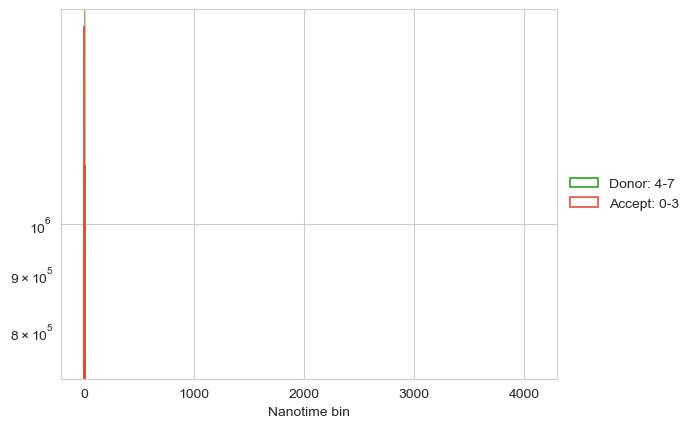

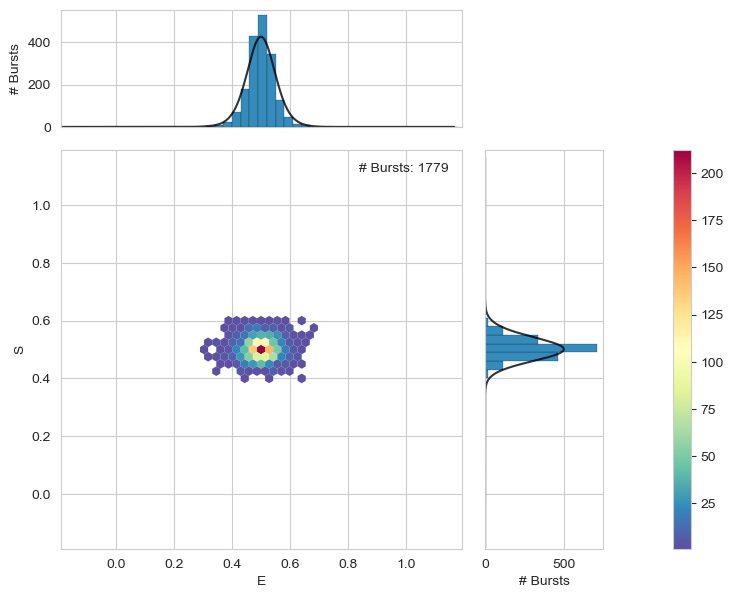

In [22]:
#Quick check of the simulation files
d = fb.loader.photon_hdf5("smFRET_aa3ff9_P_15_s0_D_1.0e-11_E_50_EmTot_350k_BgD1500_BgA1500_t_max_500s_pie.hdf5")

d.add(D_ON=(4, 7), A_ON=(0, 3))
fb.plot_alternation_hist(d);
fb.loader.alex_apply_period(d)

d.calc_bg(fun=fb.bg.exp_fit, time_s = 30, F_bg=1.7)
d.burst_search(F=6, m = 5)
d.fuse_bursts(ms = 0)
ds = d.select_bursts(fb.select_bursts.size, add_naa = False, th1=60)
ds = ds.select_bursts(fb.select_bursts.naa, th1=40)
fb.alex_jointplot(ds);

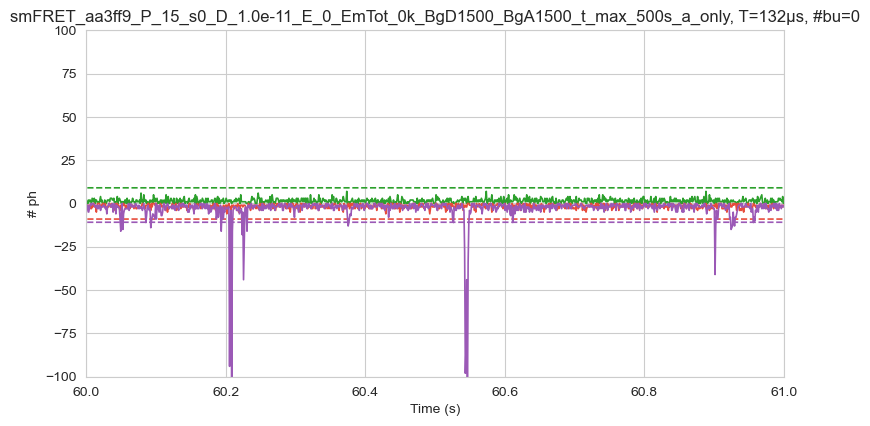

In [19]:
t_trace = 60
fb.dplot(ds, fb.timetrace, tmin=t_trace, tmax=t_trace+1, bursts=True);